In [ ]:
#Mounting Drive and Uploading Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

covidData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid Data.csv')

In [ ]:
covidData.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
print("Dataset shape:", covidData.shape)  # Rows and columns
print("Data Types:\n", covidData.dtypes)
print("Missing Values:\n", covidData.isnull().sum())
print("Missing Percentage:\n", (covidData.isnull().sum() / len(covidData)) * 100)
print("Duplicate Rows:", covidData.duplicated().sum())

Dataset shape: (1048575, 21)
Data Types:
 USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object
Missing Values:
 USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD            

In [ ]:
covidData.drop_duplicates(inplace=True)
print("Class Distribution:\n", covidData['CLASIFFICATION_FINAL'].value_counts())
print("Class Proportions (%):\n", covidData['CLASIFFICATION_FINAL'].value_counts(normalize=True) * 100)
print("Dataset shape:", covidData.shape)

Class Distribution:
 CLASIFFICATION_FINAL
3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: count, dtype: int64
Class Proportions (%):
 CLASIFFICATION_FINAL
3    45.116393
7    32.586270
6    14.217887
5     4.608373
1     1.999780
2     0.780464
4     0.690833
Name: proportion, dtype: float64
Dataset shape: (236526, 21)


In [ ]:
covidData['CLASIFFICATION_FINAL_BINARY'] = covidData['CLASIFFICATION_FINAL'].apply(lambda x: 0 if x < 4 else 1)
print("Class Distribution:\n", covidData['CLASIFFICATION_FINAL_BINARY'].value_counts())
print("Class Proportions (%):\n", covidData['CLASIFFICATION_FINAL_BINARY'].value_counts(normalize=True) * 100)
print("Dataset shape:", covidData.shape)

Class Distribution:
 CLASIFFICATION_FINAL_BINARY
1    123238
0    113288
Name: count, dtype: int64
Class Proportions (%):
 CLASIFFICATION_FINAL_BINARY
1    52.103363
0    47.896637
Name: proportion, dtype: float64
Dataset shape: (236526, 22)


In [ ]:
covidData.drop(['CLASIFFICATION_FINAL'], axis=1, inplace=True)

In [ ]:
print("Dataset shape:", covidData.shape)

Dataset shape: (236526, 21)


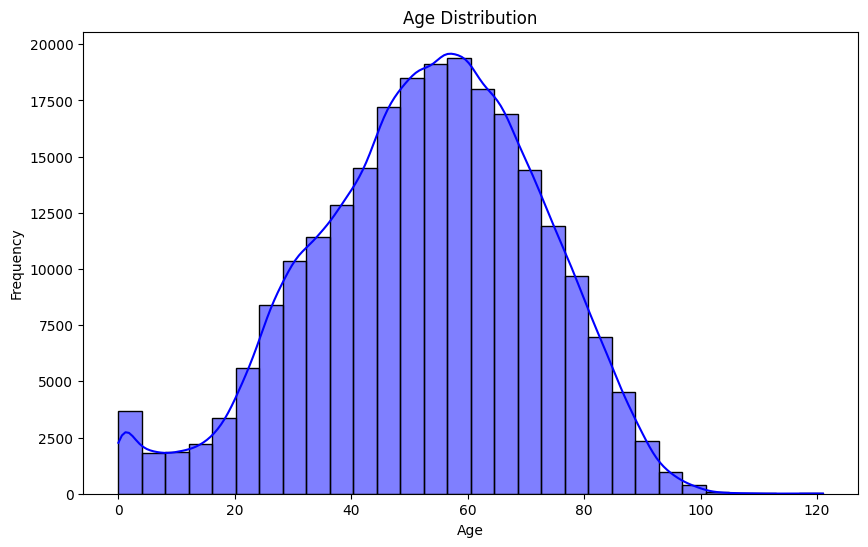

In [ ]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(covidData['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-fa90d7b7b406>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=covidData, palette='pastel')


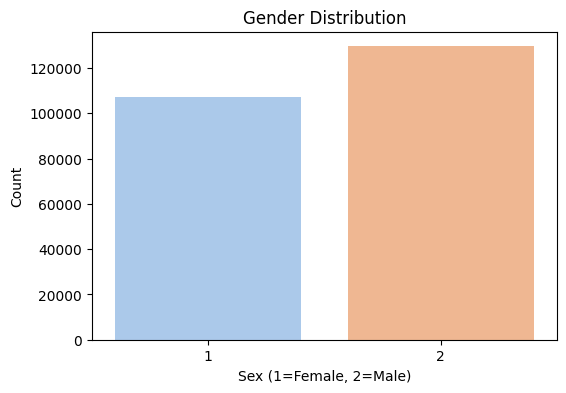

In [ ]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=covidData, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex (1=Female, 2=Male)')
plt.ylabel('Count')
plt.show()

<ipython-input-14-0c0a5fcd3340>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PATIENT_TYPE', data=covidData, palette='pastel')


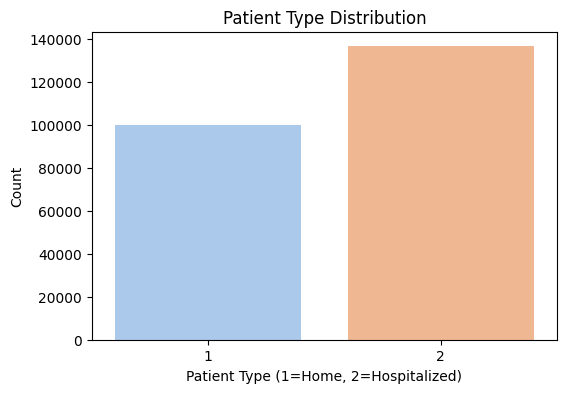

In [ ]:
# Distribution of patient type
plt.figure(figsize=(6, 4))
sns.countplot(x='PATIENT_TYPE', data=covidData, palette='pastel')
plt.title('Patient Type Distribution')
plt.xlabel('Patient Type (1=Home, 2=Hospitalized)')
plt.ylabel('Count')
plt.show()

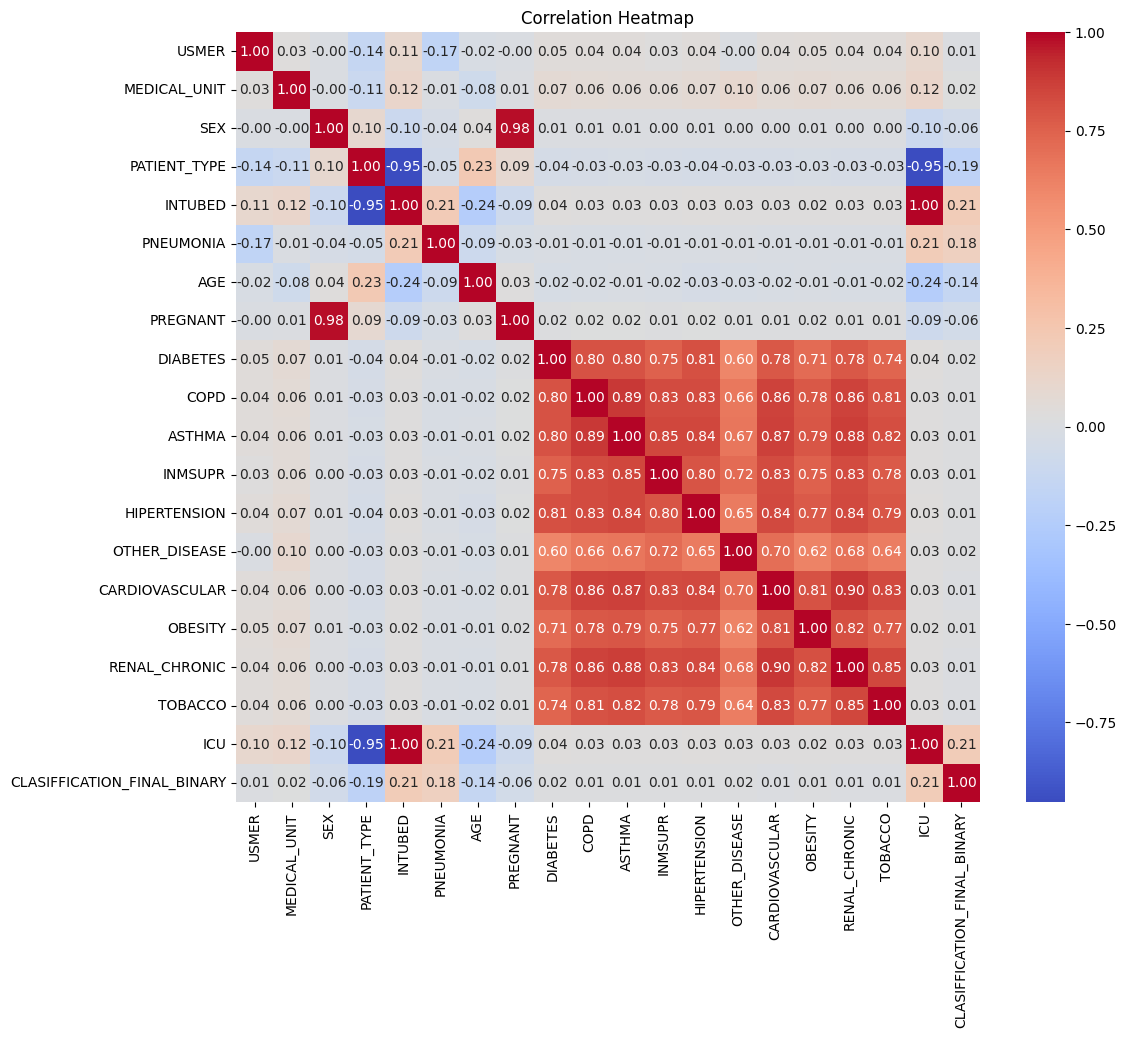

In [ ]:
# Correlation heatmap w/o data_died
covidData_numeric = covidData.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = covidData_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

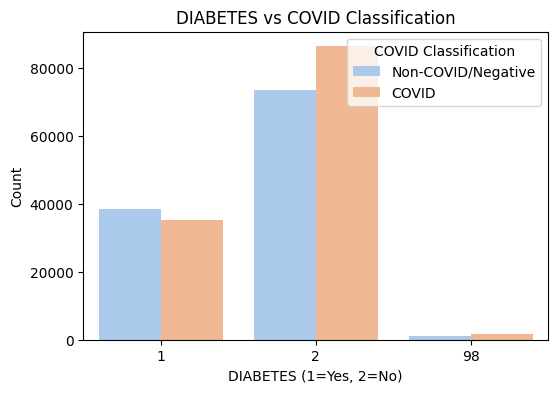

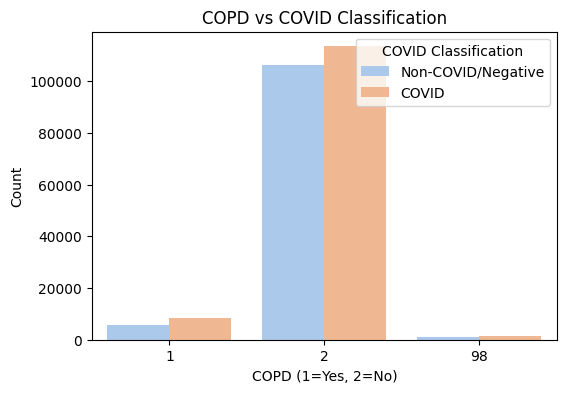

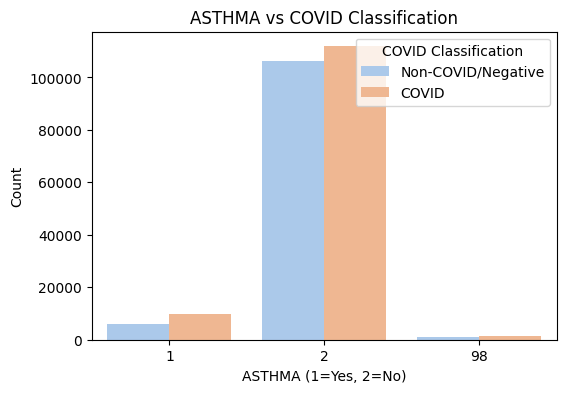

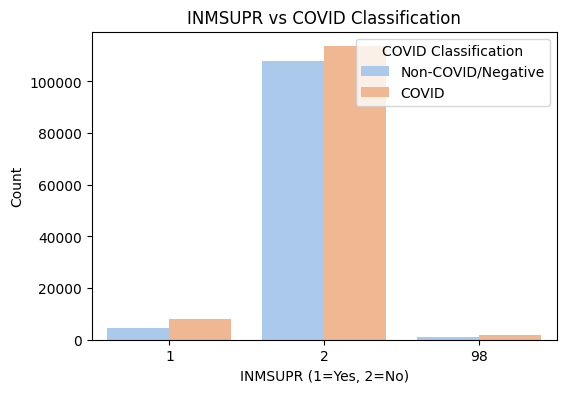

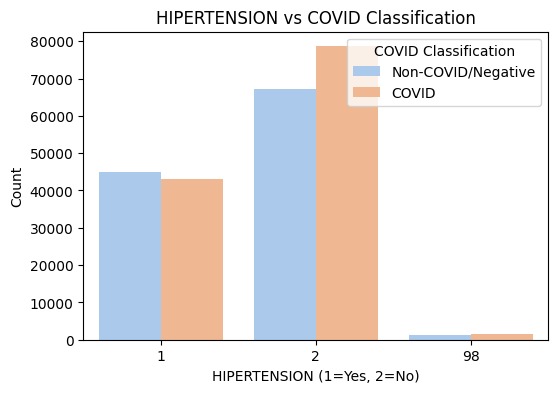

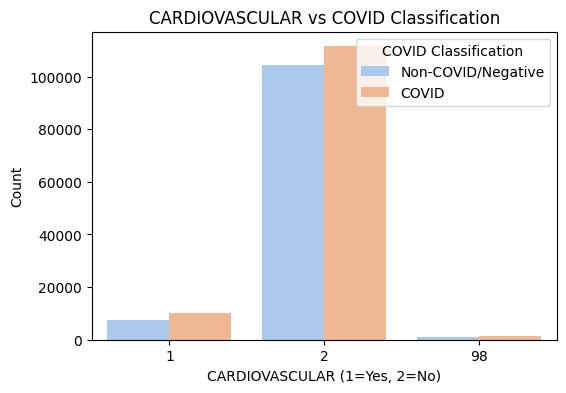

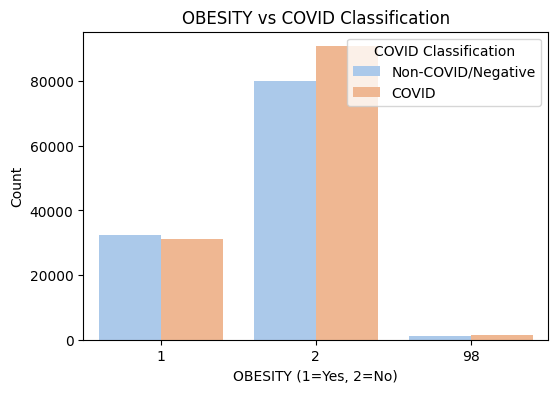

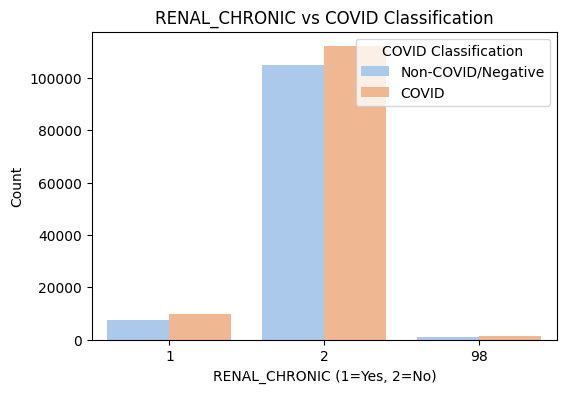

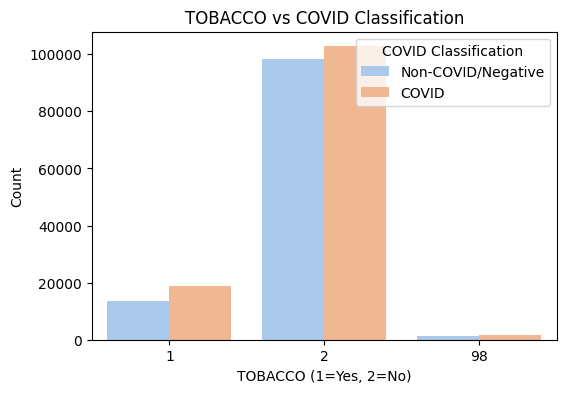

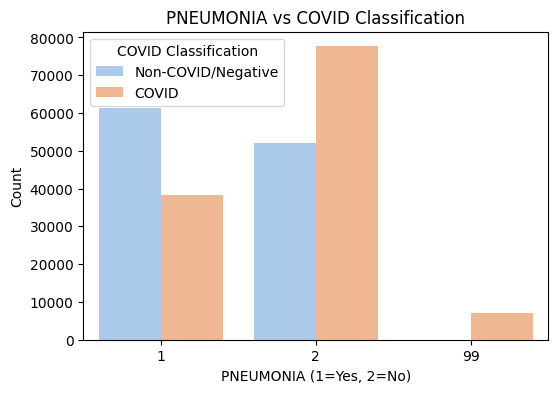

In [ ]:
# Relationship between comorbidities and classification
comorbidities = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR',
                 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PNEUMONIA']
for condition in comorbidities:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=condition, hue='CLASIFFICATION_FINAL_BINARY', data=covidData, palette='pastel')
    plt.title(f'{condition} vs COVID Classification')
    plt.xlabel(f'{condition} (1=Yes, 2=No)')
    plt.ylabel('Count')
    plt.legend(title='COVID Classification', labels=['Non-COVID/Negative', 'COVID'])
    plt.show()

<ipython-input-17-3d61ca44413e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIED', data=covidData, palette='pastel')


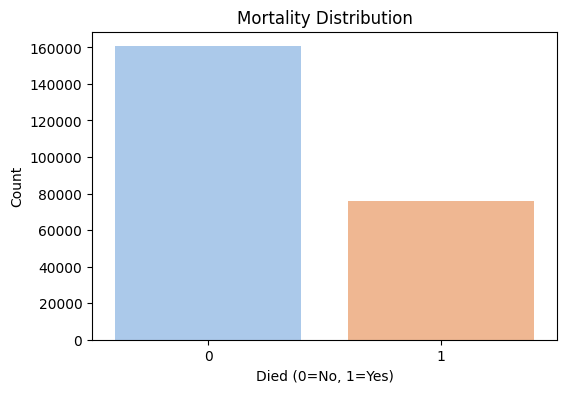

In [ ]:
# Mortality analysis
covidData['DIED'] = (covidData['DATE_DIED'] != '9999-99-99').astype(int)
plt.figure(figsize=(6, 4))
sns.countplot(x='DIED', data=covidData, palette='pastel')
plt.title('Mortality Distribution')
plt.xlabel('Died (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

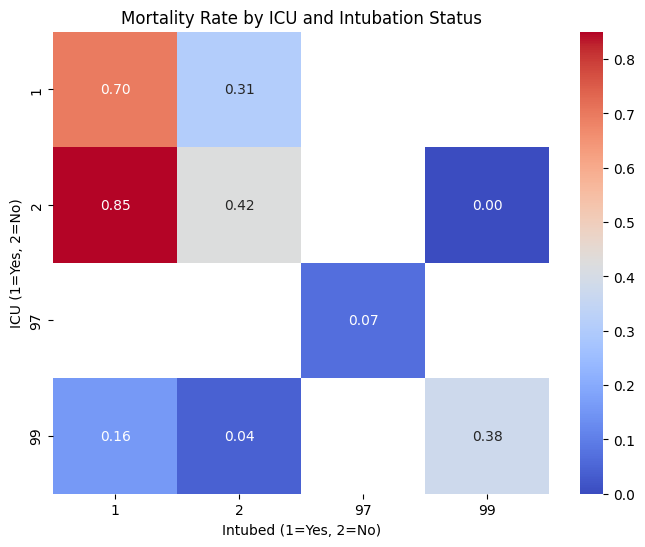

In [ ]:
# ICU, Intubation, and Mortality
pivot_icu_intubed = covidData.pivot_table(
    values='DIED', index='ICU', columns='INTUBED', aggfunc='mean'
)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_icu_intubed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mortality Rate by ICU and Intubation Status')
plt.xlabel('Intubed (1=Yes, 2=No)')
plt.ylabel('ICU (1=Yes, 2=No)')
plt.show()

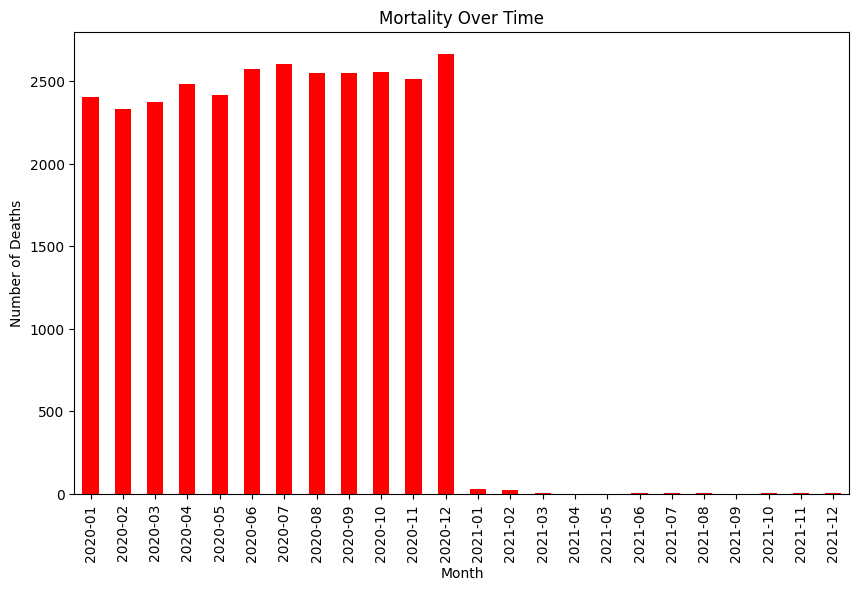

In [ ]:
covidData['DATE_DIED'] = pd.to_datetime(covidData['DATE_DIED'], errors='coerce')
mortality_over_time = covidData[covidData['DIED'] == 1].groupby(covidData['DATE_DIED'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
mortality_over_time.plot(kind='bar', color='red')
plt.title('Mortality Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()

<ipython-input-20-034ae4d4e648>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AGE_GROUP', y='DIED', data=covidData, palette='Blues')


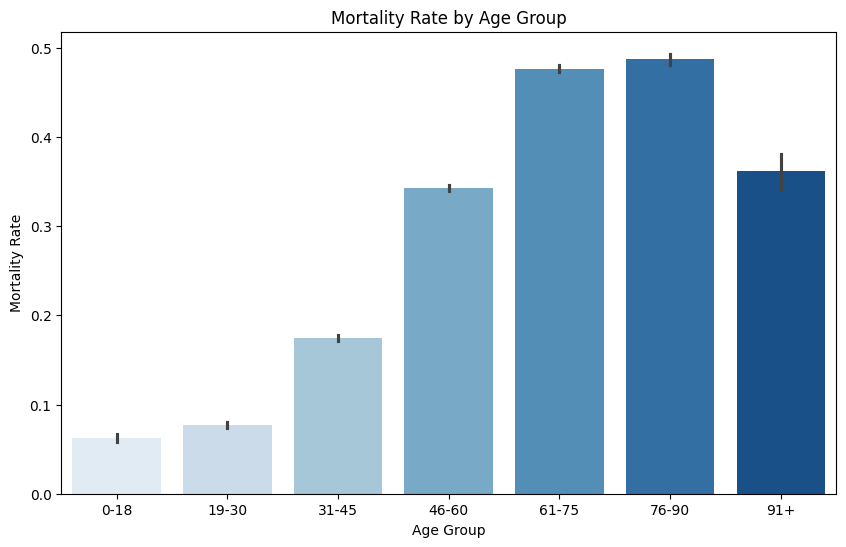

In [ ]:
# Mortality by age group
age_bins = [0, 18, 30, 45, 60, 75, 90, 120]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91+']
covidData['AGE_GROUP'] = pd.cut(covidData['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE_GROUP', y='DIED', data=covidData, palette='Blues')
plt.title('Mortality Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.show()

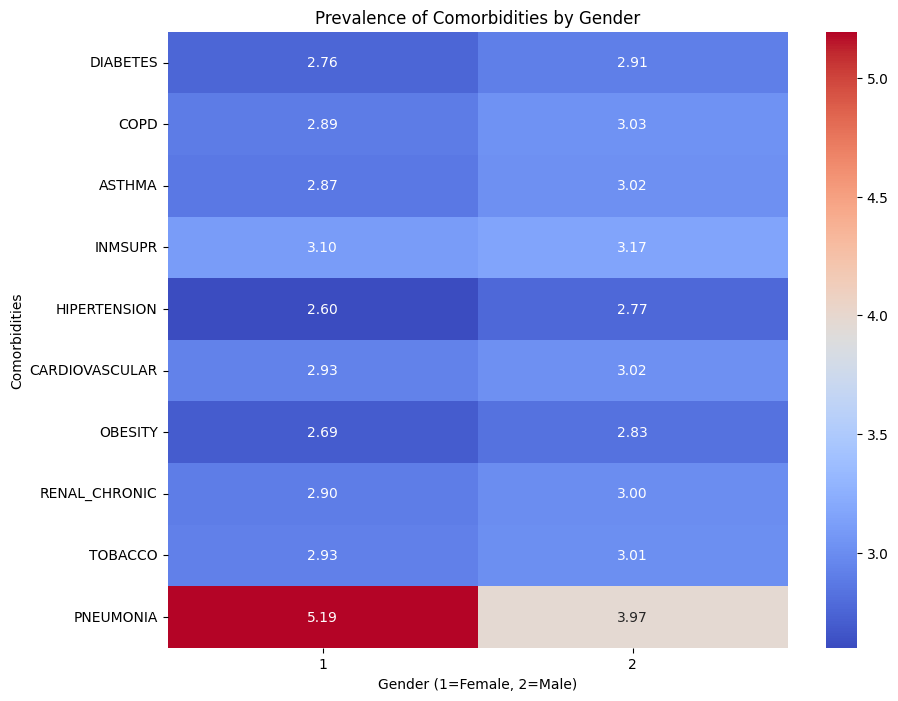

In [ ]:
# Gender and Comorbidities
gender_comorbidities = covidData.groupby('SEX')[comorbidities].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(gender_comorbidities.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Prevalence of Comorbidities by Gender')
plt.xlabel('Gender (1=Female, 2=Male)')
plt.ylabel('Comorbidities')
plt.show()

Top correlated features with the target:
CLASIFFICATION_FINAL_BINARY    1.000000
ICU                            0.208976
INTUBED                        0.208517
PNEUMONIA                      0.175552
MEDICAL_UNIT                   0.023191
OTHER_DISEASE                  0.016456
DIABETES                       0.015798
INMSUPR                        0.013807
HIPERTENSION                   0.011358
OBESITY                        0.011052
Name: CLASIFFICATION_FINAL_BINARY, dtype: float64


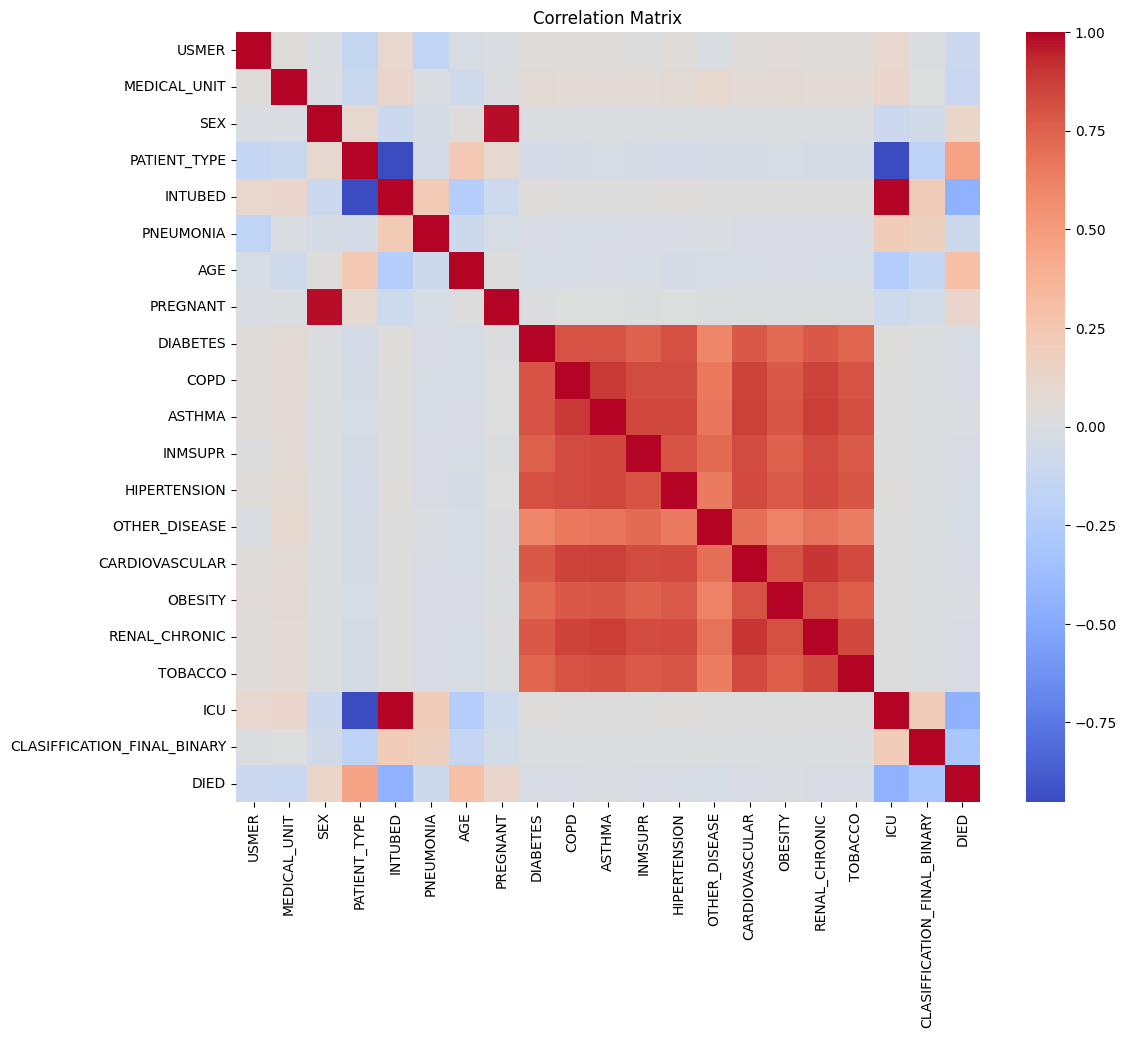

In [ ]:
#Feature Engineering - Correlation Analysis

# Drop columns not useful for modeling
model_data = covidData.drop(['DATE_DIED', 'AGE_GROUP'], axis=1)

# Separate features and target
X = model_data.drop('CLASIFFICATION_FINAL_BINARY', axis=1)
y = model_data['CLASIFFICATION_FINAL_BINARY']

# Encode categorical features (SEX, etc.) if needed
X = pd.get_dummies(X, drop_first=True)

# Correlation Analysis
# Compute correlations with the target variable
correlations = model_data.corr()['CLASIFFICATION_FINAL_BINARY'].sort_values(ascending=False)

# Display top correlated features
print("Top correlated features with the target:")
print(correlations.head(10))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(model_data.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52     16997
           1       0.57      0.58      0.58     18482

    accuracy                           0.55     35479
   macro avg       0.55      0.55      0.55     35479
weighted avg       0.55      0.55      0.55     35479

Accuracy: 0.550720144310719

Top 10 Features by Importance:
         Feature  Importance
6            AGE    0.516389
1   MEDICAL_UNIT    0.086658
19          DIED    0.081227
5      PNEUMONIA    0.054230
4        INTUBED    0.026216
12  HIPERTENSION    0.025447
8       DIABETES    0.023224
0          USMER    0.022153
18           ICU    0.021944
17       TOBACCO    0.018510


<ipython-input-23-60d1279d4d58>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


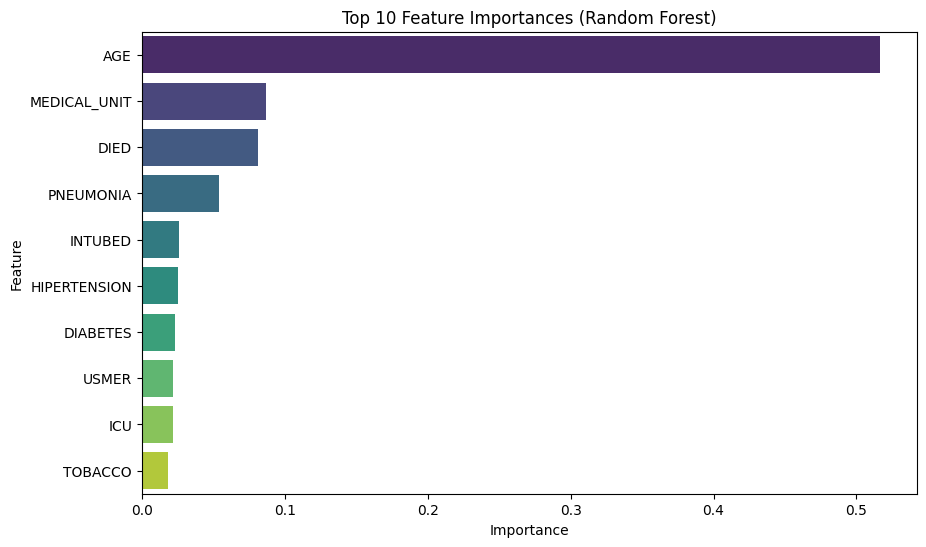


Selected Features for Modeling:
['AGE', 'MEDICAL_UNIT', 'DIED', 'PNEUMONIA', 'INTUBED', 'HIPERTENSION', 'DIABETES', 'USMER', 'ICU', 'TOBACCO', 'OBESITY', 'CARDIOVASCULAR', 'OTHER_DISEASE']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

# Random Forest for Feature Importance
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display top features
print("\nTop 10 Features by Importance:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature Selection
# Select features with high importance or correlation
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.015]['Feature'].tolist()

print("\nSelected Features for Modeling:")
print(selected_features)

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    """Evaluate model performance using accuracy, precision, recall, and F1-score."""
    print(f"\nEvaluation for {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

def plot_roc_curve(y_test, y_pred_proba, model_name):
    """Plot ROC curve and compute AUC score."""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')  # Random guessing line
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_test, y_pred, model_name):
    """Visualize confusion matrix."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

# Prepare Data (using selected features from previous steps)
X_selected = X[selected_features]
y = covidData['CLASIFFICATION_FINAL_BINARY']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Scale features for models that benefit from standardization (Logistic Regression and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.columns

Index(['AGE', 'MEDICAL_UNIT', 'DIED', 'PNEUMONIA', 'INTUBED', 'HIPERTENSION',
       'DIABETES', 'USMER', 'ICU', 'TOBACCO', 'OBESITY', 'CARDIOVASCULAR',
       'OTHER_DISEASE'],
      dtype='object')

In [ ]:
# Logistic Regression
print("\nLogistic Regression")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.48      0.57     16997
           1       0.63      0.81      0.71     18482

    accuracy                           0.65     35479
   macro avg       0.66      0.64      0.64     35479
weighted avg       0.66      0.65      0.64     35479




Evaluation for Logistic Regression
Accuracy: 0.6492
Precision: 0.6265
Recall: 0.8087
F1 Score: 0.7060


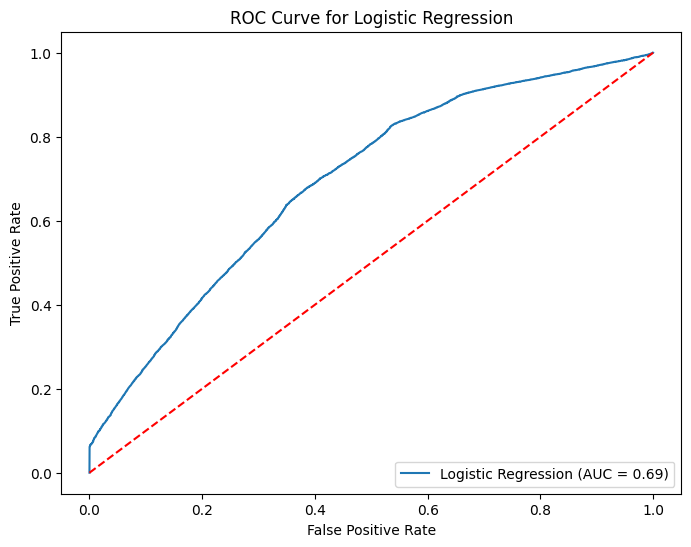

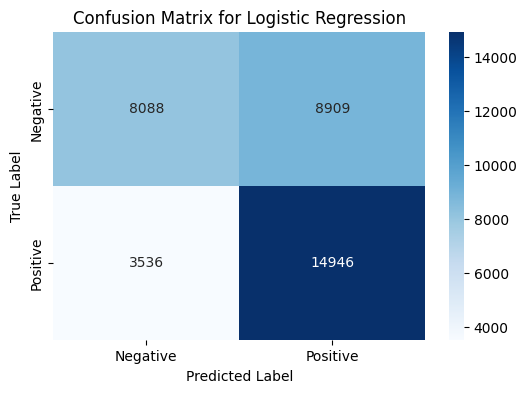

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

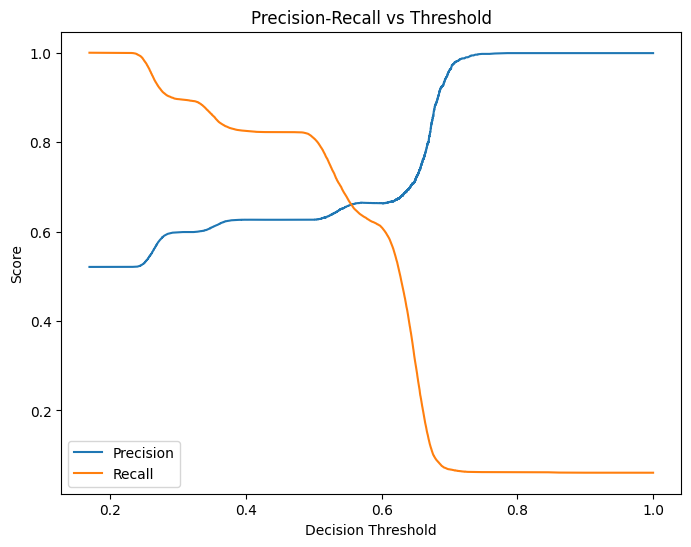

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()


Streaming output truncated to the last 5000 lines.
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold: 0.65, Precision: 0.71, Recall: 0.35
Threshold

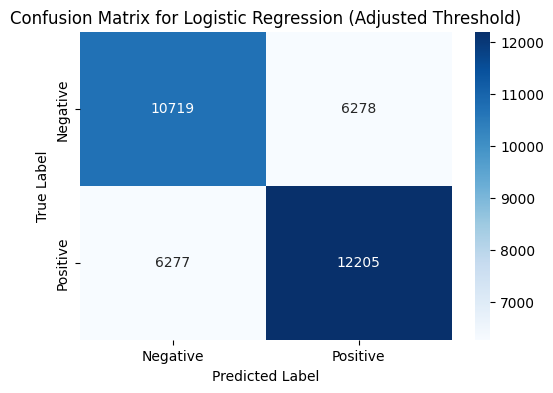

In [ ]:
# Print thresholds, precisions, and recalls
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Precision: {precisions[i]:.2f}, Recall: {recalls[i]:.2f}")

# Find threshold where precision and recall are approximately balanced
precision_recall_diff = abs(precisions[:-1] - recalls[:-1])
optimal_idx = precision_recall_diff.argmin()
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print(f"Precision: {precisions[optimal_idx]:.2f}, Recall: {recalls[optimal_idx]:.2f}")

# Refitting the model or adjusting decision boundary
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

# Evaluate adjusted predictions
evaluate_model(y_test, y_pred_adjusted, "Logistic Regression (Adjusted Threshold)")
plot_confusion_matrix(y_test, y_pred_adjusted, "Logistic Regression (Adjusted Threshold)")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid with valid combinations
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']},  # L1 + liblinear
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},  # L2 + lbfgs/saga
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]}  # ElasticNet + saga
]

# Run GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.7125962795669779


              precision    recall  f1-score   support

           0       0.71      0.47      0.56     16997
           1       0.63      0.82      0.71     18482

    accuracy                           0.65     35479
   macro avg       0.67      0.64      0.64     35479
weighted avg       0.66      0.65      0.64     35479


Evaluation for Logistic Regression
Accuracy: 0.6518
Precision: 0.6263
Recall: 0.8221
F1 Score: 0.7110


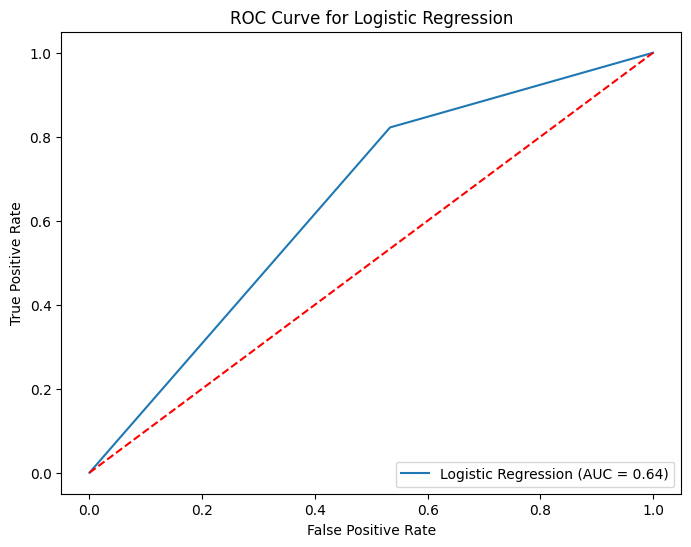

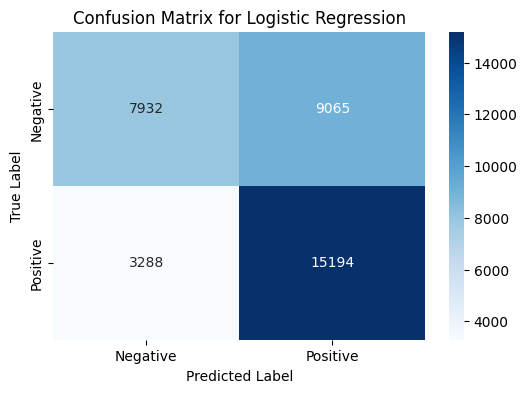

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000, C = 0.01, penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

Selected Features: Index(['AGE', 'MEDICAL_UNIT', 'DIED', 'PNEUMONIA', 'DIABETES', 'USMER', 'ICU',
       'OBESITY', 'CARDIOVASCULAR', 'OTHER_DISEASE'],
      dtype='object')

Evaluation for Logistic Regression (RFE)
Accuracy: 0.6502
Precision: 0.6265
Recall: 0.8139
F1 Score: 0.7080


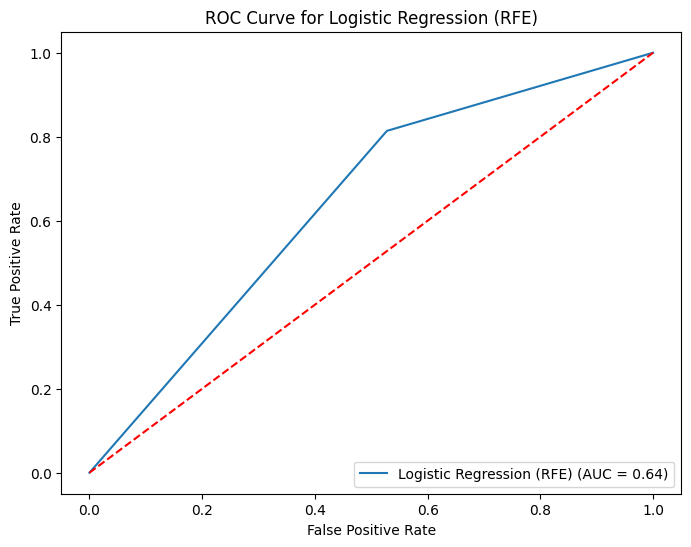

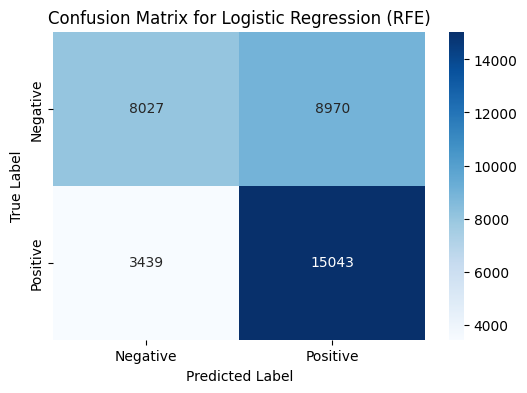

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Re-train with selected features
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

log_reg_rfe = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, C = 0.01, penalty = 'l1', solver = 'liblinear')
log_reg_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = log_reg_rfe.predict(X_test_rfe)
evaluate_model(y_test, y_pred_rfe, "Logistic Regression (RFE)")
plot_roc_curve(y_test, y_pred_rfe, "Logistic Regression (RFE)")
plot_confusion_matrix(y_test, y_pred_rfe, "Logistic Regression (RFE)")

In [ ]:
from keras.optimizers import Adam

# Neural Network Implementation
# Define the neural network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the neural network
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=0, validation_split=0.2)

# Neural Network Predictions
y_train_pred_nn = (nn_model.predict(X_train_scaled) > 0.5).astype(int)
y_test_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)
y_test_proba_nn = nn_model.predict(X_test_scaled).flatten()

# Metrics for Neural Network
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
precision_nn = precision_score(y_test, y_test_pred_nn)
recall_nn = recall_score(y_test, y_test_pred_nn)
f1_nn = f1_score(y_test, y_test_pred_nn)
auc_nn = roc_auc_score(y_test, y_test_proba_nn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6283/6283 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
print("Neural Network Metrics:")
print("Training Accuracy:", train_acc_nn)
print("Test Accuracy:", test_acc_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("AUC:", auc_nn)

Neural Network Metrics:
Training Accuracy: 0.6571448467273822
Test Accuracy: 0.6545562163533358
Precision: 0.6318062494707427
Recall: 0.8073801536630235
F1 Score: 0.7088836104513064
AUC: 0.7026271550864782



Evaluation for Neural Net (Threshold=0.58)
Accuracy: 0.6406
Precision: 0.6641
Recall: 0.6275
F1 Score: 0.6452


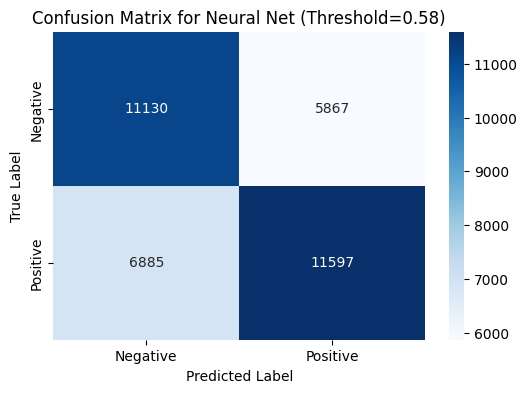

In [ ]:
optimal_threshold = 0.58  # Adjust to a higher threshold
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

# Evaluate the new predictions
evaluate_model(y_test, y_pred_adjusted, f"Neural Net (Threshold={optimal_threshold})")
plot_confusion_matrix(y_test, y_pred_adjusted, f"Neural Net (Threshold={optimal_threshold})")

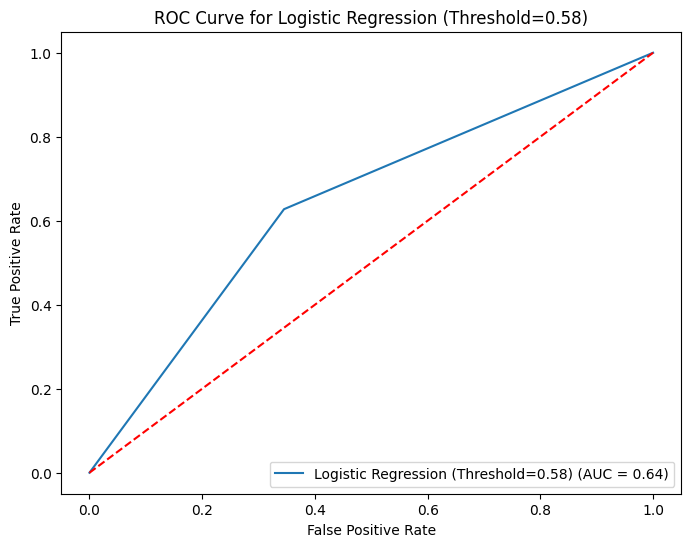

In [ ]:
plot_roc_curve(y_test, y_pred_adjusted, f"Logistic Regression (Threshold={optimal_threshold})")

In [ ]:
# Random Forest
print("\nRandom Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.59      0.53      0.56     16997
           1       0.60      0.66      0.63     18482

    accuracy                           0.60     35479
   macro avg       0.60      0.59      0.59     35479
weighted avg       0.60      0.60      0.60     35479




Evaluation for Random Forest
Accuracy: 0.5977
Precision: 0.6035
Recall: 0.6636
F1 Score: 0.6322


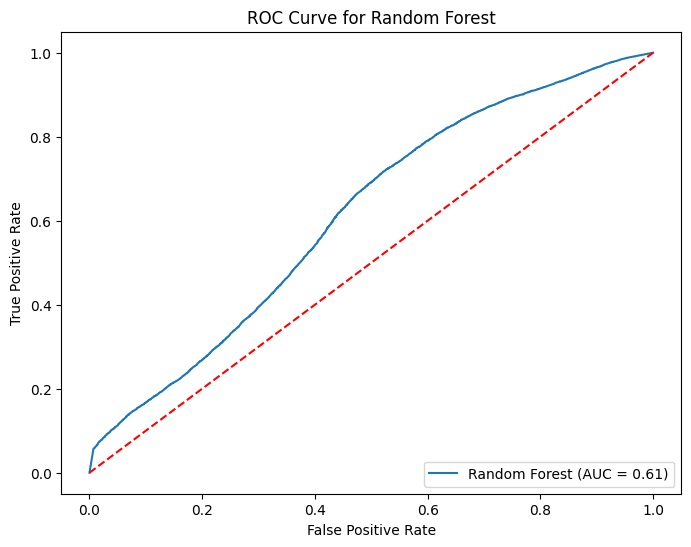

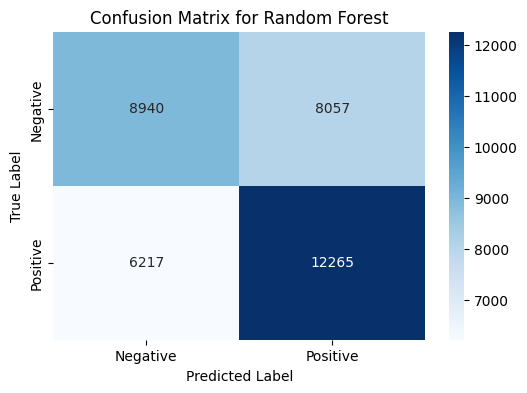

In [ ]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Initialize classical models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  # Use 'soft' for averaging probabilities

# Store models in a dictionary
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Voting Classifier": voting_clf
}

# Results storage
results = []

# Train classical models and voting classifier
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

    # Append results
    results.append({
        "Model": model_name,
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

# Neural Network Implementation
# Define the neural network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the neural network
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0, validation_split=0.2)

# Neural Network Predictions
y_train_pred_nn = (nn_model.predict(X_train) > 0.5).astype(int)
y_test_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
y_test_proba_nn = nn_model.predict(X_test).flatten()

# Metrics for Neural Network
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
precision_nn = precision_score(y_test, y_test_pred_nn)
recall_nn = recall_score(y_test, y_test_pred_nn)
f1_nn = f1_score(y_test, y_test_pred_nn)
auc_nn = roc_auc_score(y_test, y_test_proba_nn)

# Append Neural Network results
results.append({
    "Model": "Neural Network",
    "Training Accuracy": train_acc_nn,
    "Test Accuracy": test_acc_nn,
    "Precision": precision_nn,
    "Recall": recall_nn,
    "F1 Score": f1_nn,
    "AUC": auc_nn
})

# Display all results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:40:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6283/6283 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
                 Model  Training Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression           0.650738       0.648778   0.626614  0.806136   
1        Random Forest           0.782016       0.597677   0.603533  0.663619   
2              XGBoost           0.678409       0.669889   0.655646  0.771507   
3    Voting Classifier           0.743916       0.644973   0.638091  0.735797   
4       Neural Network           0.658921       0.657516   0.640983  0.778704   

   F1 Score       AUC  
0  0.705128  0.693481  
1  0.632151  0.613712  
2  0.708874  0.718706  
3  0.683470  0.675024  
4  0.703164  0.704675  


In [ ]:
from sklearn.metrics import roc_curve, auc  # Make sure auc is imported

def plot_roc_curve_xgboost(y_test, y_pred_proba, model_name):
    """Plot ROC curve and compute AUC score."""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)  # Use the imported auc function
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

              precision    recall  f1-score   support

           0       0.69      0.56      0.62     16997
           1       0.66      0.77      0.71     18482

    accuracy                           0.67     35479
   macro avg       0.67      0.67      0.66     35479
weighted avg       0.67      0.67      0.67     35479

Accuracy: 0.6698892302488796

Evaluation for XGBoost
Accuracy: 0.6699
Precision: 0.6556
Recall: 0.7715
F1 Score: 0.7089


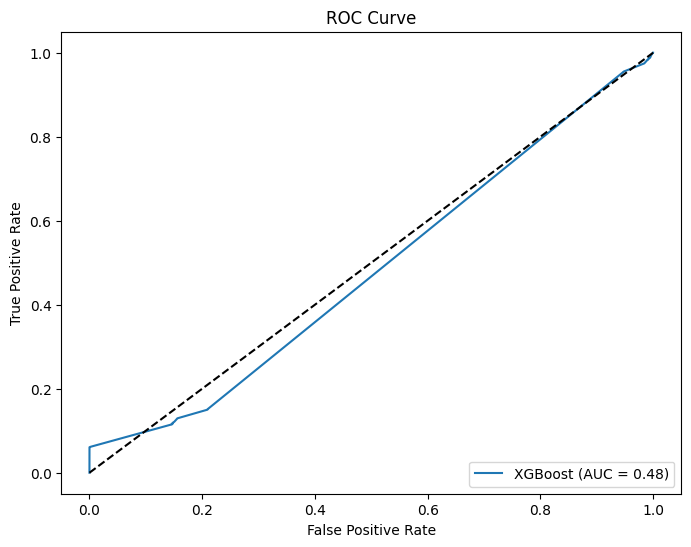

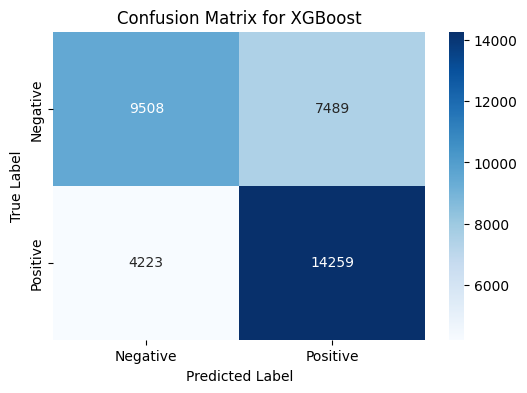

In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plot_roc_curve_xgboost(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Parameter grid for n_estimators and learning_rate
param_grid_1 = {
    'n_estimators': [270, 274],
    'learning_rate': [0.09],
    'max_depth': [7],
}

# Initialize XGBoost
xgb_model_1 = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid search for n_estimators and learning_rate
grid_search_1 = GridSearchCV(estimator=xgb_model_1, param_grid=param_grid_1, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_1.fit(X_train_scaled, y_train)

# Results
print("Best Parameters for Block 1 (n_estimators, learning_rate):", grid_search_1.best_params_)
print("Best Accuracy Score for Block 1:", grid_search_1.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters for Block 1 (n_estimators, learning_rate): {'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 274}
Best Accuracy Score for Block 1: 0.669261402383192


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 7, 8],  # Test slightly smaller and larger depths
    'min_child_weight': [1, 3, 5]  # Minimum sum of instance weights (regularizes complexity)
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        n_estimators=274,
        scale_pos_weight=5,
        learning_rate=0.09,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 8, 'min_child_weight': 5}
Best Accuracy: 0.5652906942226618


In [ ]:
param_grid = {
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 5]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        n_estimators=274,
        max_depth=7,
        scale_pos_weight=5,
        learning_rate=0.09,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'gamma': 0, 'reg_alpha': 1, 'reg_lambda': 1}
Best Accuracy: 0.5638134396126422


In [ ]:
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        n_estimators=274,
        max_depth=7,
        scale_pos_weight=5,
        learning_rate=0.09,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'colsample_bytree': 1.0, 'subsample': 0.6}
Best Accuracy: 0.5654001236971293



XGBoost
              precision    recall  f1-score   support

           0       0.70      0.55      0.61     16997
           1       0.65      0.78      0.71     18482

    accuracy                           0.67     35479
   macro avg       0.68      0.66      0.66     35479
weighted avg       0.67      0.67      0.66     35479

Accuracy: 0.6696919304377237

Evaluation for XGBoost
Accuracy: 0.6697
Precision: 0.6531
Recall: 0.7805
F1 Score: 0.7111


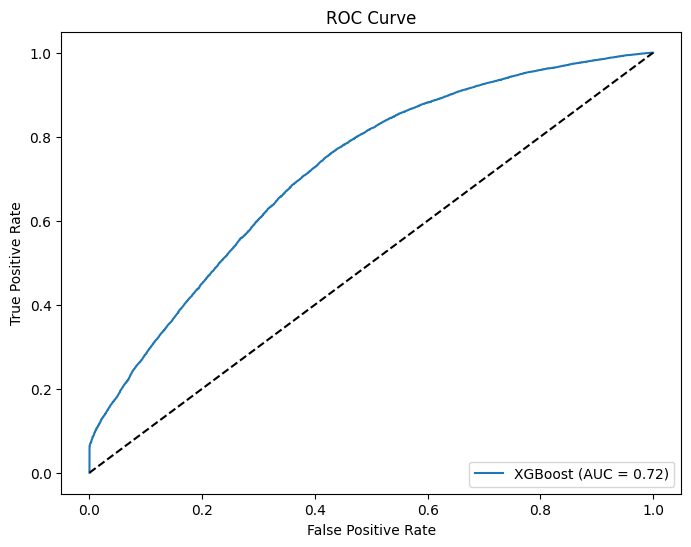

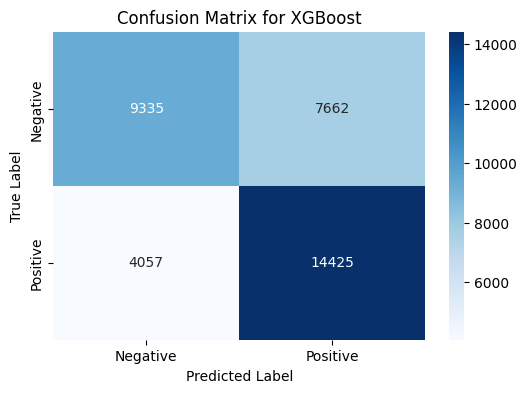

In [ ]:
# XGBoost
print("\nXGBoost")
xgb_model = XGBClassifier(max_depth = 6, eval_metric='error', objective='binary:logistic', reg_alpha = 0.5, reg_lambda = 0.8, tree_method = "exact", learning_rate = 0.09, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plot_roc_curve_xgboost(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


XGBoost
Cross-Validation Accuracy Scores: [0.67000915 0.67152123 0.67060602 0.66849708 0.67144165 0.6697704
 0.66742271 0.66522085]
Mean CV Accuracy: 0.6693111357529127
Standard Deviation of CV Accuracy: 0.002023541562950609

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.55      0.61     16997
           1       0.65      0.78      0.71     18482

    accuracy                           0.67     35479
   macro avg       0.67      0.66      0.66     35479
weighted avg       0.67      0.67      0.66     35479

Accuracy: 0.6690436596296401

Evaluation for XGBoost
Accuracy: 0.6690
Precision: 0.6526
Recall: 0.7796
F1 Score: 0.7105


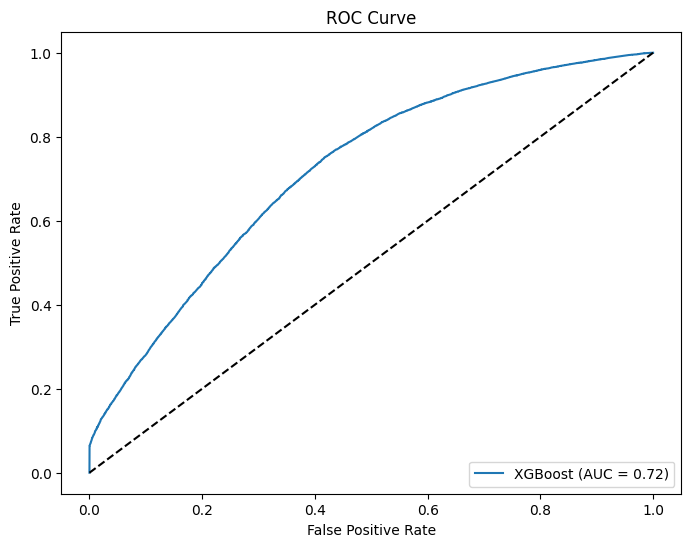

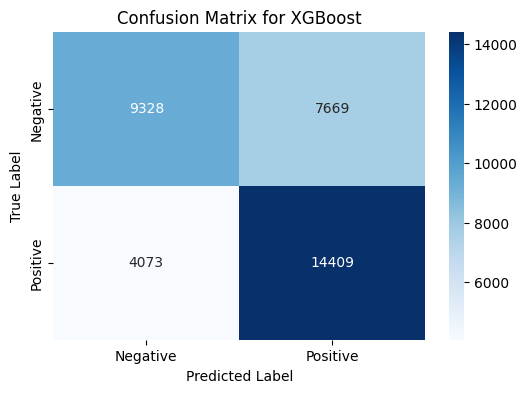

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the XGBoost model
print("\nXGBoost")
xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    eval_metric='error',
    objective='binary:logistic',
    reg_alpha=0.6,
    reg_lambda=0.6,
    tree_method="exact",
    learning_rate=0.01,
    random_state=42
)

# Define the k-fold cross-validation
kf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

# Train on the full training set and evaluate on the test set
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Additional evaluation metrics and plots
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plot_roc_curve_xgboost(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


Accuracy with Adjusted Threshold: 0.6701992728092675

Evaluation for XGBoost
Accuracy: 0.6702
Precision: 0.6565
Recall: 0.7695
F1 Score: 0.7085


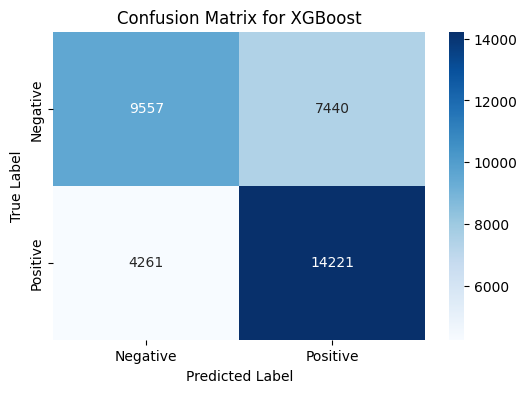

In [ ]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.51  # Adjust threshold
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Evaluate performance
from sklearn.metrics import accuracy_score
print("Accuracy with Adjusted Threshold:", accuracy_score(y_test, y_pred_adjusted))
evaluate_model(y_test, y_pred_adjusted, "XGBoost")
plot_confusion_matrix(y_test, y_pred_adjusted, "XGBoost")

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between features and target
mi_scores = mutual_info_classif(X_train, y_train)
feature_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Select top N features based on scores
top_features = feature_scores.head(10).index
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
# Add Gaussian noise to augment data
noise = np.random.normal(0, 0.01, X_train_selected.shape)
X_augmented = pd.concat([X_train_selected, X_train_selected + noise])
y_augmented = np.concatenate([y_train, y_train])


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your augmented dataset is used for training
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, random_state=42)),
    ],
    final_estimator=LogisticRegression(),
    cv=5  # Optional cross-validation within stacking
)

# Train the stacking model
stack_model.fit(X_augmented, y_augmented)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [ ]:
# Predict on the test set
y_pred_test = stack_model.predict(X_test_selected)
y_proba_test = stack_model.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class

In [ ]:
# Training accuracy
y_pred_train = stack_model.predict(X_augmented)
train_accuracy = accuracy_score(y_augmented, y_pred_train)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# ROC AUC
auc = roc_auc_score(y_test, y_proba_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Print Results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Training Accuracy: 0.6892
Test Accuracy: 0.6669
Precision: 0.6511
Recall: 0.7770
F1 Score: 0.7085
AUC: 0.7155


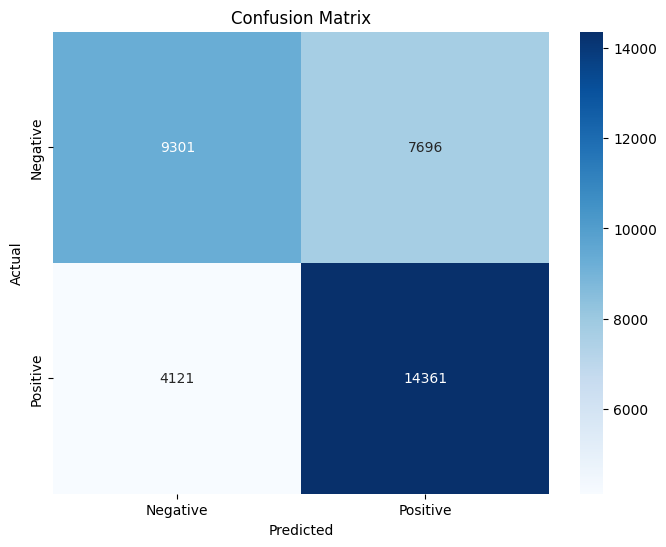

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


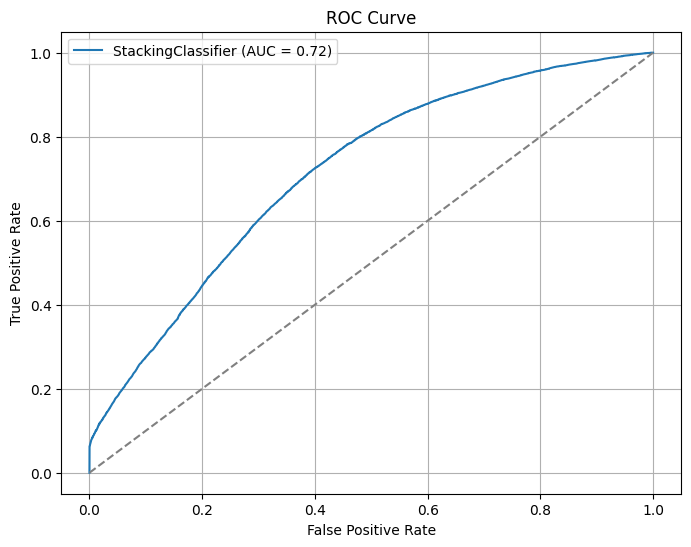

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'StackingClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=300, n_jobs=-1, random_state=42)),
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
)

# Train the stacking model
stack_model.fit(X_augmented, y_augmented)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gr...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [ ]:
# Predict on the test set
y_pred_test = stack_model.predict(X_test_selected)
y_proba_test = stack_model.predict_proba(X_test_selected)[:, 1]  # Probability for the positive class

# Training accuracy
y_pred_train = stack_model.predict(X_augmented)
train_accuracy = accuracy_score(y_augmented, y_pred_train)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# ROC AUC
auc = roc_auc_score(y_test, y_proba_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Print Results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Training Accuracy: 0.7069
Test Accuracy: 0.6643
Precision: 0.6440
Recall: 0.7952
F1 Score: 0.7116
AUC: 0.7123


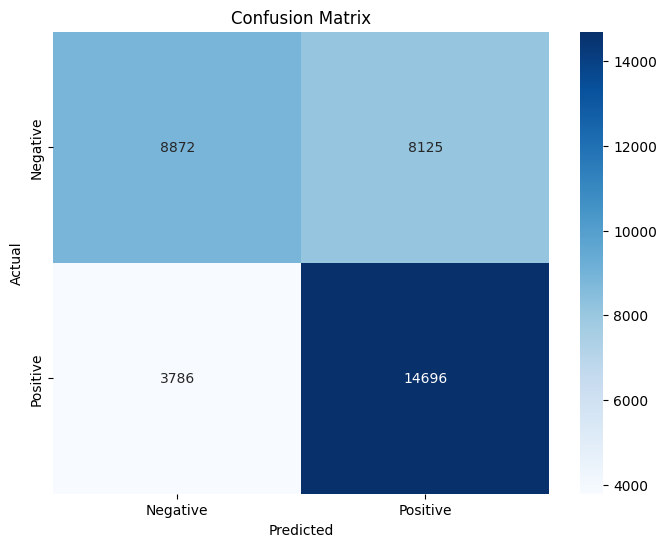

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

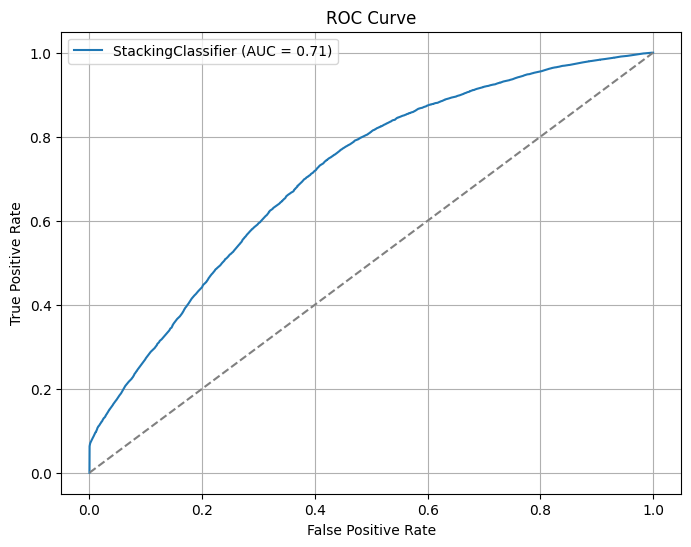

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'StackingClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_augmented)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
from keras.optimizers import Adam

# Neural Network Implementation
# Define the neural network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the neural network
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0, validation_split=0.2)

# Neural Network Predictions
y_train_pred_nn = (nn_model.predict(X_train_scaled) > 0.5).astype(int)
y_test_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)
y_test_proba_nn = nn_model.predict(X_test_scaled).flatten()

# Metrics for Neural Network
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
precision_nn = precision_score(y_test, y_test_pred_nn)
recall_nn = recall_score(y_test, y_test_pred_nn)
f1_nn = f1_score(y_test, y_test_pred_nn)
auc_nn = roc_auc_score(y_test, y_test_proba_nn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 321675
'y' sizes: 201047


In [ ]:
print("Neural Network Metrics:")
print("Training Accuracy:", train_acc_nn)
print("Test Accuracy:", test_acc_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("AUC:", auc_nn)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Base Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Base Neural Network Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Dropout Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Batch Normalization Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Optimized Learning Rate Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Early Stopping Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_proba = model.predict(X_test).flatten()

print("Final Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


In [ ]:
# Define parameter grid for regularization
param_grid_reg = {
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 2, 5]    # L2 regularization
}

# Grid search
grid_search_reg = GridSearchCV(
    estimator=XGBClassifier(
        n_estimators=grid_search.best_params_['n_estimators'],
        max_depth=grid_search.best_params_['max_depth'],
        learning_rate=grid_search.best_params_['learning_rate'],
        subsample=grid_search.best_params_['subsample'],
        colsample_bytree=grid_search.best_params_['colsample_bytree'],
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False
    ),
    param_grid=param_grid_reg,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_reg.fit(X_train, y_train)

# Best parameters and score
print("Best Regularization Parameters:", grid_search_reg.best_params_)
print("Best Accuracy:", grid_search_reg.best_score_)


In [ ]:
from collections import Counter

# Compute scale_pos_weight
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print("Scale Pos Weight:", scale_pos_weight)

# Update the model with the computed scale_pos_weight
xgb_balanced = XGBClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'],
    subsample=grid_search.best_params_['subsample'],
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    gamma=grid_search_reg.best_params_['gamma'],
    reg_alpha=grid_search_reg.best_params_['reg_alpha'],
    reg_lambda=grid_search_reg.best_params_['reg_lambda'],
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

xgb_balanced.fit(X_train, y_train)

# Evaluate
y_pred = xgb_balanced.predict(X_test)
y_proba = xgb_balanced.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")


In [ ]:
# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_early_stopping = XGBClassifier(
    n_estimators=1000,  # Large initial value
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'],
    subsample=grid_search.best_params_['subsample'],
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    gamma=grid_search_reg.best_params_['gamma'],
    reg_alpha=grid_search_reg.best_params_['reg_alpha'],
    reg_lambda=grid_search_reg.best_params_['reg_lambda'],
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

# Use the eval_set parameter for early stopping
# The fit method automatically handles early stopping when eval_set is provided.
xgb_early_stopping.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    # early_stopping_rounds=50,  # Remove this line, it's handled automatically
    verbose=True
)

# Evaluate
y_pred = xgb_early_stopping.predict(X_test)
y_proba = xgb_early_stopping.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_early_stopping, importance_type='gain', max_num_features=10)  # Top 10 features
plt.show()

In [ ]:
# Step 1: Perform SMOTE (Synthetic Minority Oversampling)
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Original dataset shape:", X_train.shape, "Original class distribution:", np.bincount(y_train))
print("SMOTE dataset shape:", X_train_smote.shape, "SMOTE class distribution:", np.bincount(y_train_smote))

print(X_train_smote.columns)

# Step 2: Data Augmentation (Adding noise)
X_train_augmented = X_train_smote + np.random.normal(0, 0.01, X_train_smote.shape)
X_train_combined = np.vstack((X_train_smote, X_train_augmented))
y_train_combined = np.hstack((y_train_smote, y_train_smote))  # Duplicate labels for augmented data

print("Augmented dataset shape:", X_train_combined.shape, "Augmented class distribution:", np.bincount(y_train_combined))

# Step 3: Increase Model Complexity (XGBoost with deeper trees and more estimators)
xgb_model = XGBClassifier(
    n_estimators=1000,         # Increase the number of trees
    max_depth=10,              # Increase the depth of trees
    learning_rate=0.01,        # Lower learning rate for better generalization
    subsample=0.8,             # Use 80% of rows for each tree
    colsample_bytree=0.8,      # Use 80% of features for each tree
    gamma=1,                   # Add regularization
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1,              # L2 regularization
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_train_combined, y_train_combined)

# Step 4: Evaluate the Model
y_train_pred = xgb_model.predict(X_train_combined)
y_test_pred = xgb_model.predict(X_test)
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]  # For AUC

# Training Metrics
train_accuracy = accuracy_score(y_train_combined, y_train_pred)

# Test Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_proba)

# Print Results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

In [ ]:
X_train_combined = pd.DataFrame(X_train_combined, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)
X_train_combined.head()

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10)  # Top 10 features
plt.title("Feature Importance")
plt.show()


In [ ]:
xgb_model.fit(X_train_combined, y_train_combined)

# Ensure X_train_combined and X_test have matching column names and are strings
xgb_feature_names = X_train_combined.columns  # Extract column names as a list

# Step 1: Extract Feature Importance with Correct Names
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')

# Map feature importance scores to column names
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)  # Sort by importance
important_features = [col for col, _ in sorted_features[:5]]  # Select top 5 features by name

print(X_train_combined.columns)

print("Top Features Based on Importance (Mapped to DataFrame):", important_features)

# Step 2: Create Feature Interactions
# Create interaction features for the top features
for i in range(len(important_features)):
    for j in range(i + 1, len(important_features)):
        feature1 = important_features[i]
        feature2 = important_features[j]

        # Ensure the features exist in the DataFrame
        if feature1 in X_train_combined.columns and feature2 in X_train_combined.columns:
            interaction_name = f"{feature1}_x_{feature2}"
            X_train_combined[interaction_name] = X_train_combined[feature1] * X_train_combined[feature2]
            X_test[interaction_name] = X_test[feature1] * X_test[feature2]

# Step 3: Verify the new dataset shapes
print("Updated X_train_combined Shape:", X_train_combined.shape)
print("Updated X_test Shape:", X_test.shape)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Train the XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=500,         # Number of trees
    max_depth=7,              # Depth of trees
    learning_rate=0.05,       # Learning rate
    subsample=0.8,            # Subsampling ratio
    colsample_bytree=0.8,     # Fraction of features for each tree
    eval_metric='logloss',    # Evaluation metric
    random_state=42          # For reproducibility
)

# Train the model
xgb_model.fit(X_train_combined, y_train_combined)

# Step 2: Evaluate the Model on the Test Set
# Predict probabilities and classes
y_proba_test = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_test = xgb_model.predict(X_test)              # Predicted classes

# Step 3: Calculate Evaluation Metrics
# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Metrics for the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
adjusted_f1 = f1_score(y_test, y_pred_adjusted)
adjusted_auc = roc_auc_score(y_test, y_proba_test)

# Training accuracy for reference
train_accuracy = accuracy_score(y_train_combined, xgb_model.predict(X_train_combined))

# Step 4: Print the Results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {adjusted_precision:.4f}")
print(f"Recall (Adjusted Threshold): {adjusted_recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {adjusted_f1:.4f}")
print(f"AUC (Adjusted Threshold): {adjusted_auc:.4f}")


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize CatBoost
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=7,
    eval_metric='Logloss',
    random_seed=42,
    verbose=False  # Suppress training output
)

# Train the model
cat_model.fit(X_train_combined, y_train_combined)

# Predict on the test set
y_pred_test = cat_model.predict(X_test)
y_proba_test = cat_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Evaluate metrics
train_accuracy = accuracy_score(y_train_combined, cat_model.predict(X_train_combined))
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_proba_test)

# Print results
print("Cat_Model:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {precision:.4f}")
print(f"Recall (Adjusted Threshold): {recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")
print(f"AUC (Adjusted Threshold): {auc:.4f}")


In [ ]:
from lightgbm import LGBMClassifier

# Initialize LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# Train the model
lgbm_model.fit(X_train_combined, y_train_combined)

# Predict on the test set
y_pred_test = lgbm_model.predict(X_test)
y_proba_test = lgbm_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Evaluate metrics
train_accuracy = accuracy_score(y_train_combined, lgbm_model.predict(X_train_combined))
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_proba_test)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {precision:.4f}")
print(f"Recall (Adjusted Threshold): {recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")
print(f"AUC (Adjusted Threshold): {auc:.4f}")


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 7]
}

# Initialize CatBoost
cat_model = CatBoostClassifier(
    eval_metric='Logloss',
    random_seed=42,
    verbose=False  # Suppress output
)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

grid_search.fit(X_train_combined, y_train_combined)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_cat_model = grid_search.best_estimator_


In [ ]:
cat_model = CatBoostClassifier(
    eval_metric='Logloss',
    random_seed=42,
    verbose=False,
    task_type="CPU"  # Use CPU instead of GPU
)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=15,
    scoring='accuracy',
    cv=2,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_combined, y_train_combined)

# Best parameters and evaluation
print("Best Parameters:", random_search.best_params_)
best_cat_model = random_search.best_estimator_


In [ ]:
# Predict on the test set with the tuned model
y_proba_test = best_cat_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_test = best_cat_model.predict(X_test)

# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Evaluate metrics
train_accuracy = accuracy_score(y_train_combined, best_cat_model.predict(X_train_combined))
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_proba_test)

# Print results
print("\nCatBoost Model Evaluation (After Tuning):")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {precision:.4f}")
print(f"Recall (Adjusted Threshold): {recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")
print(f"AUC (Adjusted Threshold): {auc:.4f}")

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Build the Model
def create_dnn(input_dim):
    model = Sequential()
    # Input layer
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
dnn_model = create_dnn(X_train_combined.shape[1])

# Step 2: Train the Model
history = dnn_model.fit(
    X_train_combined, y_train_combined,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

In [ ]:
# Step 3: Evaluate the Model on the Test Set
# Predict probabilities and classes
y_proba_test = dnn_model.predict(X_test).flatten()  # Probabilities
y_pred_test = (y_proba_test >= 0.5).astype(int)     # Class predictions (default threshold 0.5)

# Adjust threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Metrics
train_accuracy = history.history['accuracy'][-1]  # Final training accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_proba_test)

# Print Results
print("\nDNN Model Evaluation:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {precision:.4f}")
print(f"Recall (Adjusted Threshold): {recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")
print(f"AUC (Adjusted Threshold): {auc:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install sdv

In [ ]:
import importlib
import sdv
importlib.reload(sdv)

In [ ]:
# Add Gaussian noise to numeric features
X_noisy = X_train_combined.copy()
noise = np.random.normal(0, 0.01, X_noisy.shape)  # Mean 0, Std Dev 0.01
X_noisy += noise

# Combine original and noisy datasets
X_augmented = pd.concat([X_train_combined, pd.DataFrame(X_noisy, columns=X_train_combined.columns)])
y_augmented = np.concatenate([y_train_combined, y_train_combined])

print("New Data Shape After Noise Augmentation:", X_augmented.shape)


In [ ]:
# Create the model
dnn_model = create_dnn(X_augmented.shape[1])

# Step 2: Train the Model
history = dnn_model.fit(
    X_augmented, y_augmented,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

In [ ]:
cat_model = CatBoostClassifier(
    eval_metric='Logloss',
    random_seed=42,
    verbose=False,
    task_type="CPU"  # Use CPU instead of GPU
)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=15,
    scoring='accuracy',
    cv=2,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_augmented, y_augmented)

# Best parameters and evaluation
print("Best Parameters:", random_search.best_params_)
best_cat_model = random_search.best_estimator_


In [ ]:
# Predict on the test set with the tuned model
y_proba_test = best_cat_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_test = best_cat_model.predict(X_test)

# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_proba_test >= threshold).astype(int)

# Evaluate metrics
train_accuracy = accuracy_score(y_augmented, best_cat_model.predict(X_augmented))
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_proba_test)

# Print results
print("\nCatBoost Model Evaluation (After Tuning):")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Adjusted Threshold): {precision:.4f}")
print(f"Recall (Adjusted Threshold): {recall:.4f}")
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")
print(f"AUC (Adjusted Threshold): {auc:.4f}")

In [ ]:
evaluate_model(y_test, y_pred_adjusted, "CatBoost")
plot_confusion_matrix(y_test, y_pred_adjusted, "CatBoost")
plot_roc_curve_xgboost(y_test, y_proba_test, "CatBoost")

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,         # Increase the number of trees
    max_depth=7,              # Increase the depth of trees
    learning_rate=0.09,        # Lower learning rate for better generalization
    subsample=1,             # Use 80% of rows for each tree
    colsample_bytree=0.8,      # Use 80% of features for each tree
    reg_alpha=0.1,             # L1 regularization
    gamma=3,
    eta = 0.1,
    tree_method = 'exact',
    objective='binary:hinge',
    min_child_weight=1,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_augmented, y_augmented)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plot_roc_curve_xgboost(y_test, xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_curve(y_true, y_proba, model_name):
    """
    Plot the Precision-Recall Curve.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=model_name)
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with XGBoost predictions
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_precision_recall_curve(y_test, y_proba_xgb, "XGBoost")


In [ ]:
from xgboost import plot_importance

def plot_feature_importance(model, feature_names, model_name):
    """
    Plot Feature Importance from XGBoost model.
    """
    plt.figure(figsize=(12, 8))
    plot_importance(model, importance_type='gain', max_num_features=10, show_values=True)
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

# Call the function to plot feature importance
plot_feature_importance(xgb_model, X_augmented.columns, "XGBoost")